<a href="https://colab.research.google.com/github/youssefhoffmann/A-star-Algorithm/blob/master/Copie_de_hexcel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Reshape, Conv2DTranspose
from keras.layers import LeakyReLU, Dropout
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [ ]:
# define the discriminator model
def define_D(in_shape=(124,1003,3)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    #model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
model_D=define_D()
model_D.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 124, 1003, 64)     1792      
_________________________________________________________________
leaky_re_lu_63 (LeakyReLU)   (None, 124, 1003, 64)     0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 62, 502, 64)       36928     
_________________________________________________________________
leaky_re_lu_64 (LeakyReLU)   (None, 62, 502, 64)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 31, 251, 64)       36928     
_________________________________________________________________
leaky_re_lu_65 (LeakyReLU)   (None, 31, 251, 64)       0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 497984)          

In [ ]:
# define the generator model
def define_G(latent_dim):
    model = Sequential()
	  # foundation for 16x16 image
    n_nodes = 31* 251 * 64
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((31, 251, 64)))
    # upsample to 32x32
    #model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
    #model.add(LeakyReLU(alpha=0.2))
    # upsample to 64x64
    model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsamplde to 128x128
    model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (7,7), activation='tanh', padding='same'))
    
    
    return model

In [ ]:
model_G=define_G(100)
model_G.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 497984)            50296384  
_________________________________________________________________
leaky_re_lu_66 (LeakyReLU)   (None, 497984)            0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 31, 251, 64)       0         
_________________________________________________________________
conv2d_transpose_20 (Conv2DT (None, 62, 502, 64)       65600     
_________________________________________________________________
leaky_re_lu_67 (LeakyReLU)   (None, 62, 502, 64)       0         
_________________________________________________________________
conv2d_transpose_21 (Conv2DT (None, 124, 1004, 64)     65600     
_________________________________________________________________
leaky_re_lu_68 (LeakyReLU)   (None, 124, 1004, 64)   

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_GAN(model_G, model_D):
	# make weights in the discriminator not trainable
	model_D.trainable = False
	model = Sequential()
	model.add(model_G)
	model.add(model_D)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
def load_real_images():
    import cv2
    import glob

    path = glob.glob('/content/sample_data/hexcel/*.tif')
    print(path)
    pairs=[]
    for file in path:
       
       img=cv2.imread(file)
       img_array=np.array(img)
       pairs.append(img_array)

    return pairs

In [ ]:
X=load_real_images()

print(np.shape(X))
print(type(X))

['/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730656.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730870.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730084.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730325.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730284.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730864.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730735.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730508.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730521.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730509.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730939.tif', '/content/sample_data/hexcel/VPB-seg-0.52microns-Hexcel1102_1003x124x9730093.tif', '/c

In [ ]:
def generate_real_images(dataset, n_samples):
    dataset=np.array(dataset)
    i = np.random.randint(0, dataset.shape[0], n_samples)
    print(i)
    X = dataset[i]
    y = np.ones((n_samples,1))
    return X, y

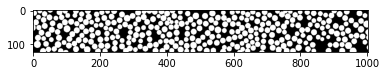

In [ ]:
plt.imshow(X[7])
plt.show()

In [ ]:
X=generate_real_images(X,10)
print(X)


In [ ]:
def generate_latent_points(latent_dim, n_samples):
    X = np.random.randn(latent_dim * n_samples)
    X = X.reshape(n_samples, latent_dim)
    return X

In [ ]:
Y=generate_latent_points(100,10)
print(Y)

In [ ]:
print(type(Y))
print(np.shape(Y))

<class 'numpy.ndarray'>
(10, 100)


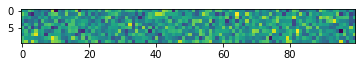

In [ ]:
plt.imshow(Y)
plt.show()

In [ ]:
def generate_fake_images(model_G, latent_dim, n_samples):
    X_input = generate_latent_points(latent_dim, n_samples)
    X = model_G.predict(X_input)
    y = np.zeros((n_samples, 1))
    return X, y

In [ ]:
X=generate_fake_images(model_G,100,10)
print(type(X))
print(X)


In [ ]:
def summarize_performance(epoch, model_G, model_D, dataset, latent_dim, n_samples=10):
  model_G.save('/content/drive/My Drive/Colab Notebooks/model_dog_' +str(epoch)+ '.h5')
  X_real, y_real = generate_real_images(dataset, n_samples)
  _, acc_real = model_D.evaluate(X_real, y_real, verbose=0)
  x_fake, y_fake = generate_fake_images(model_G, latent_dim, n_samples)
  _, acc_fake = model_D.evaluate(x_fake, y_fake, verbose=0)
  print('Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

In [ ]:
def train_discriminator(model, dataset, n_iter=100, n_batch=8):
    half_batch = int(n_batch/2)
    # manually enumerate epochs
    for i in range(n_iter):
        X_real, y_real = generate_real_images(dataset, half_batch)
        _, real_acc = model.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_images(half_batch)
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        print('%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [ ]:
def train_GAN(model_G, model_D, model_GAN, dataset, latent_dim, n_epochs=100, n_batch=8):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			X_real, y_real = generate_real_images(dataset, half_batch)
			X_fake, y_fake = generate_fake_images(model_G, latent_dim, half_batch)
			X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
			d_loss, _ = model_D.train_on_batch(X, y)
			X_gan = generate_latent_points(latent_dim, n_batch)
			y_gan = np.ones((n_batch, 1))
			g_loss = model_GAN.train_on_batch(X_gan, y_gan)
			print('%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance
		if (i+1) % 100 == 0:
			summarize_performance(i, model_G, model_D, dataset, latent_dim)

In [ ]:
latent_dim =100
in_shape=(124,1003,3)
model_D = define_D()
model_G = define_G(latent_dim)
model_GAN = define_GAN(model_G, model_D)
dataset=load_real_images()
train_GAN(model_G, model_D,model_GAN,dataset[0], latent_dim)

In [ ]:
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	return z_input

In [ ]:
def plot_images(images, n):
	# scales image values in the range of [0,1]
	images = (images-images.min())/(images.max() - images.min())
	for i in range(n):
		# define subplot
		plt.subplot(1, n, 1 + i)
		# turn off axis
		#plt.axis('off')
		# plot raw pixel data
		plt.imshow(images[i, :, :],cmap='viridis')
	plt.show()

In [ ]:
model_G1=load_model('/content/drive/My Drive/Colab Notebooks/model_dog_99.h5')

In [ ]:
model_G2=load_model('/content/drive/My Drive/Colab Notebooks/model_dog_9.h5')

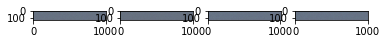

In [ ]:
pts = generate_latent_points(100, 30)
# generate images
X = model_G1.predict(pts)
# plot the result
plot_images(X, 4)

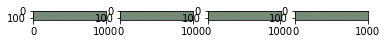

In [ ]:
pts = generate_latent_points(100, 30)
# generate images
X = model_G2.predict(pts)
# plot the result
plot_images(X, 4)